In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/20
1191/1191 [==============================] - 2s 962us/step - loss: 0.4008 - accuracy: 0.8228 - val_loss: 0.3047 - val_accuracy: 0.8754
Epoch 2/20
1191/1191 [==============================] - 1s 940us/step - loss: 0.2974 - accuracy: 0.8730 - val_loss: 0.2759 - val_accuracy: 0.8832
Epoch 3/20
1191/1191 [==============================] - 1s 861us/step - loss: 0.2748 - accuracy: 0.8823 - val_loss: 0.2563 - val_accuracy: 0.8923
Epoch 4/20
1191/1191 [==============================] - 1s 910us/step - loss: 0.2635 - accuracy: 0.8866 - val_loss: 0.2512 - val_accuracy: 0.8954
Epoch 5/20
1191/1191 [==============================] - 1s 869us/step - loss: 0.2561 - accuracy: 0.8909 - val_loss: 0.2451 - val_accuracy: 0.8987
Epoch 6/20
1191/1191 [==============================] - 1s 859us/step - loss: 0.2499 - accuracy: 0.8935 - val_loss: 0.2410 - val_accuracy: 0.9003
Epoch 7/20
1191/1191 [==============================] - 1s 864us/step - loss: 0.2458 - accuracy: 0.8956 - val_loss: 0.2454 -

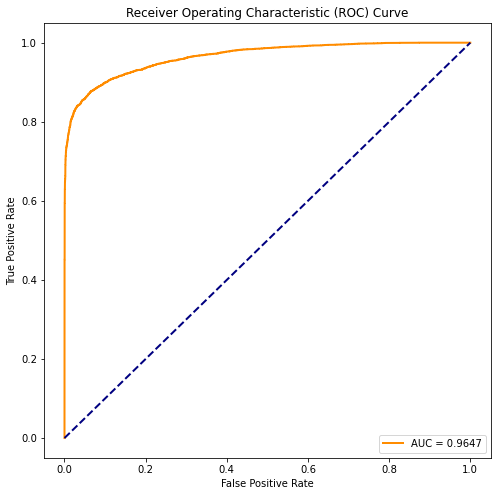

In [2]:
#ANN for Undersampled Data

# Load data
df = pd.read_csv("Preprocessed Data- Undersampling.csv", dtype={'Zip': str})

#Target Column: 'Is Fraud?'
X = df.drop('Is Fraud?', axis=1)
y = df['Is Fraud?']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Epoch 1/3
779433/779433 [==============================] - 643s 822us/step - loss: 0.1209 - accuracy: 0.9524 - val_loss: 0.1052 - val_accuracy: 0.9580
Epoch 2/3
779433/779433 [==============================] - 642s 823us/step - loss: 0.1012 - accuracy: 0.9610 - val_loss: 0.0989 - val_accuracy: 0.9609
Epoch 3/3
243573/243573 [==============================] - 123s 505us/step
Classification Report:
               precision    recall  f1-score   support

           0     0.9505    0.9734    0.9618   3895394
           1     0.9728    0.9493    0.9609   3898929

    accuracy                         0.9614   7794323
   macro avg     0.9616    0.9614    0.9614   7794323
weighted avg     0.9616    0.9614    0.9614   7794323

Confusion Matrix:
 [[3791781  103613]
 [ 197552 3701377]]
Accuracy: 0.9613609802929645
Precision: 0.9727691794196568
Recall: 0.9493317267382915
F1 Score: 0.960907558867117
AUC-ROC: 0.9941


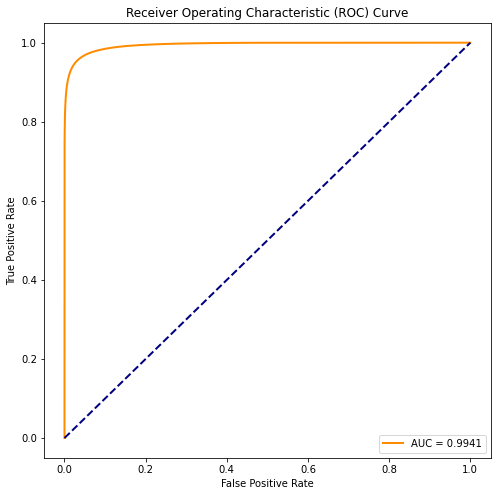

In [2]:
#ANN for Smote Data

# Load data
df= pd.read_csv("Preprocessed Data- Smote.csv", dtype={'Zip': str})

#Target Column: 'Is Fraud?'
X = df.drop('Is Fraud?', axis=1)
y = df['Is Fraud?']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
